## Gradient Descent - Boston Dataset
Boston dataset is one of the datasets available in sklearn.
You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Gradient Descent algorithm and thus predictions for the test dataset given.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File name should not have spaces. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form. 
    4. Your score is based on coefficient of determination.


In [1]:
import numpy as np
import pandas as pd

In [ ]:
# Loading Datasets

train_dataset = np.genfromtxt("training_boston_x_y_train.csv", names = True, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)

test_dataset = np.genfromtxt("test_boston_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train)

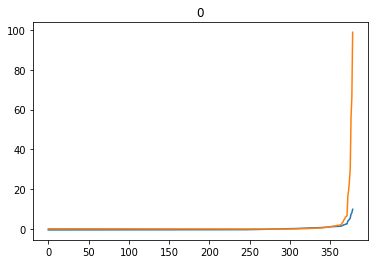

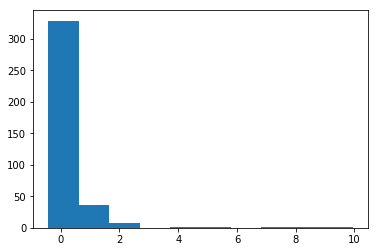

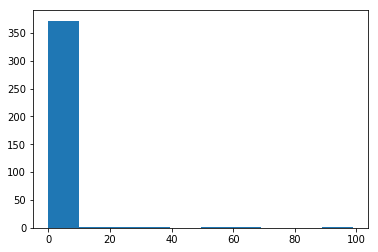

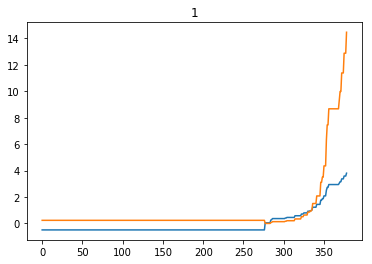

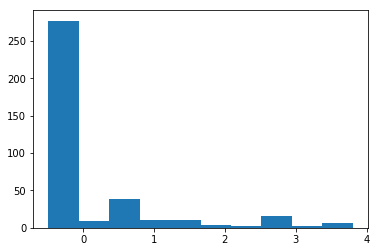

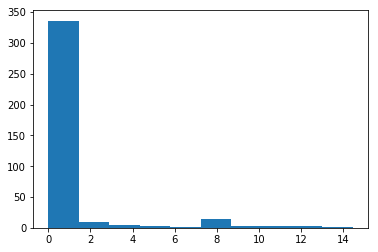

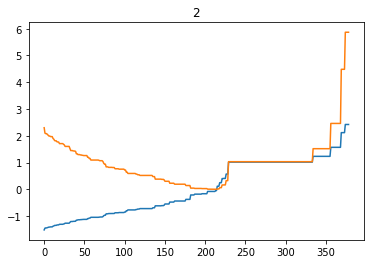

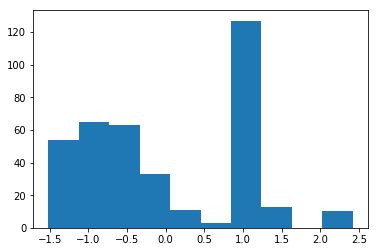

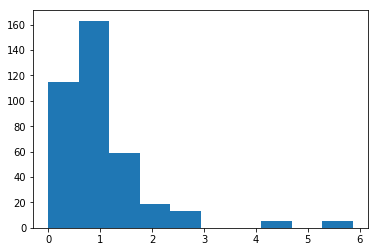

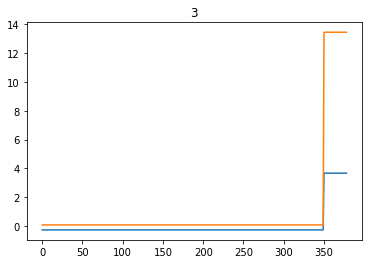

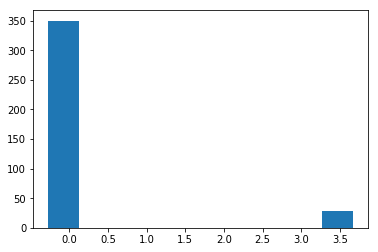

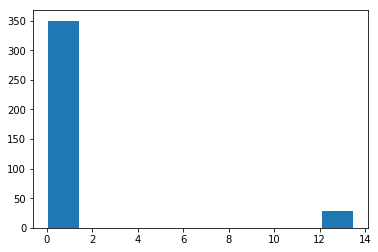

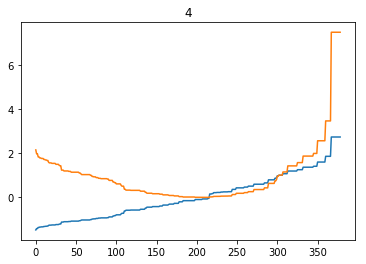

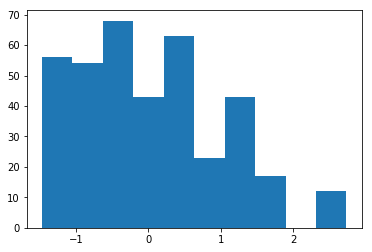

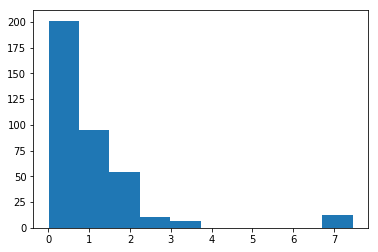

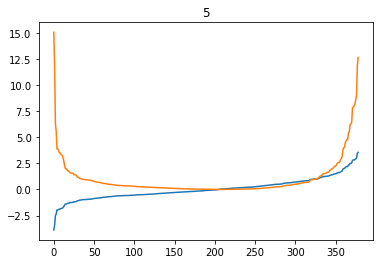

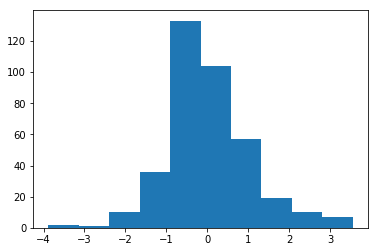

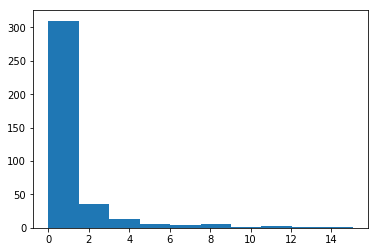

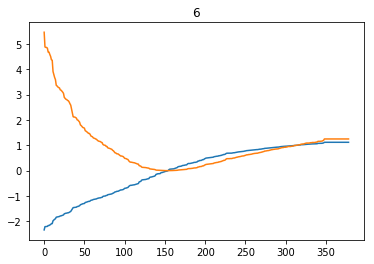

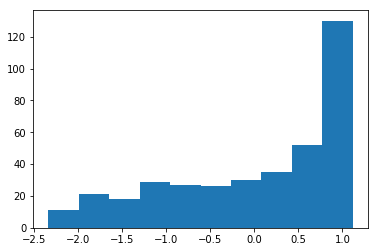

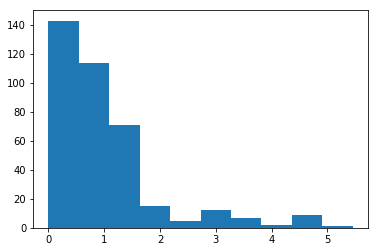

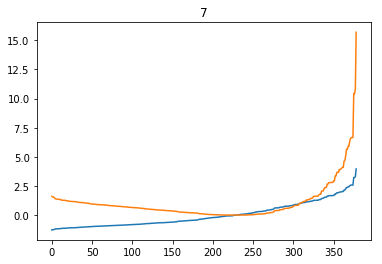

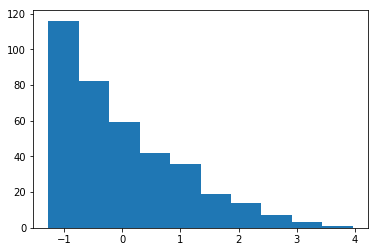

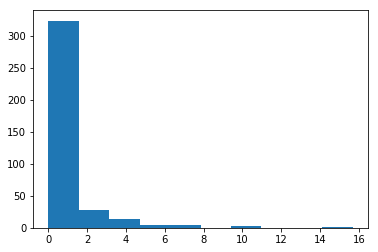

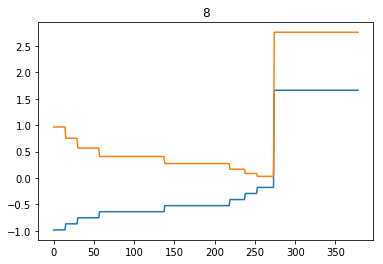

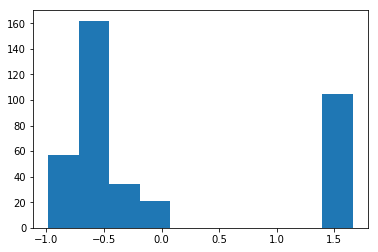

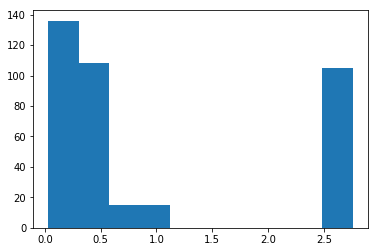

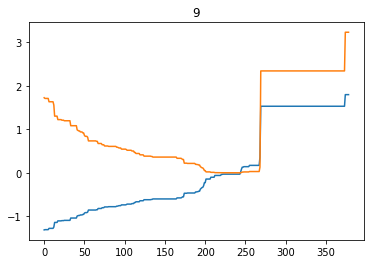

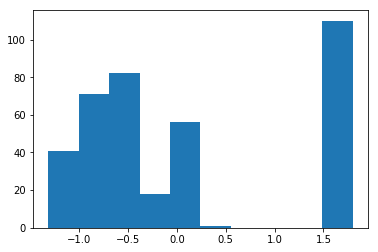

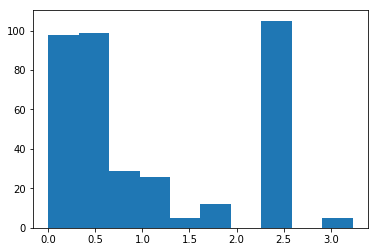

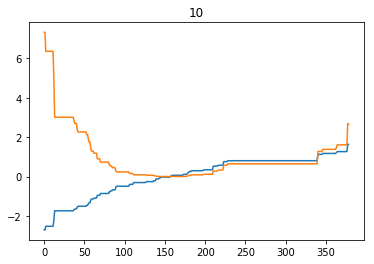

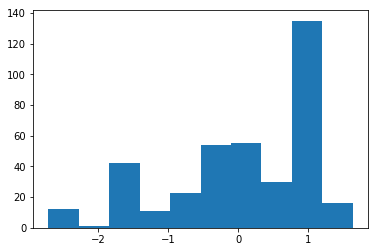

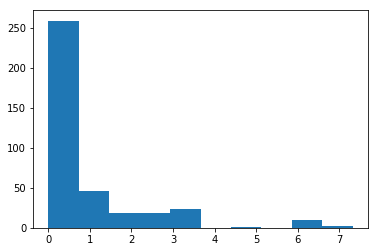

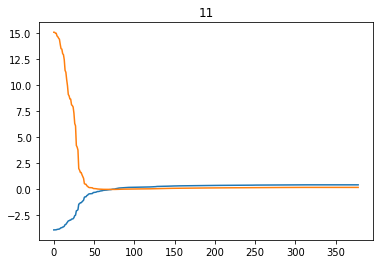

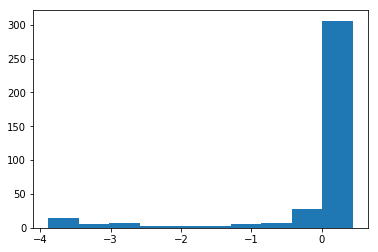

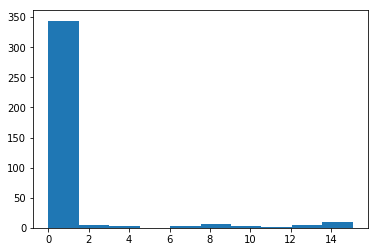

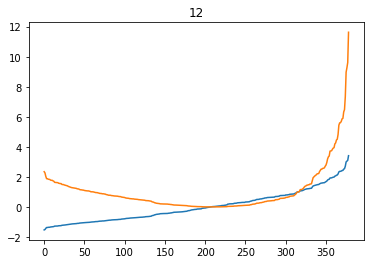

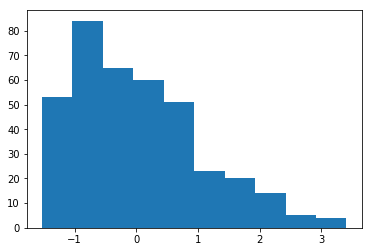

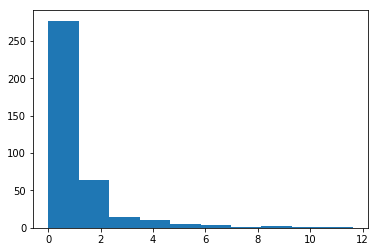

In [3]:
# plotting features
import copy
import matplotlib.pyplot as plt
for i in range(X_train.shape[1]) :
    x = copy.deepcopy(X_train[:, i])
    x.sort()
    plt.title(i)
    plt.plot(x)
    plt.plot(x**2)
    plt.show()
    plt.hist(x)
    plt.show()
    plt.hist(x**2)
    plt.show()

In [42]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    #print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 50 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X
def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)
# Introduce more features
def add_more_features (X_train, imp_cols_indices):
    X_train_df = pd.DataFrame(X_train)
    num_f = len(X_train_df.columns)
    col_names = X_train_df.columns
    new_df = X_train_df.copy()
    num_imp_cols = len(imp_col_indices)
    for i1 in range(num_imp_cols) :
        for j1 in range(i1, num_imp_cols):
            i = imp_cols_indices[i1]
            j = imp_cols_indices[j1]
            new_df[ str(col_names[i]) + "_" + str(col_names[j])] = X_train_df[i] * X_train_df[j]
    #print(new_df.describe())
    return new_df.values

In [65]:
from numpy.random import choice 
def gen_linear_regressors(X_train, Y_train, subset_size_ratio, num_regressors, alpha, num_iters) :
    n_plus_1 = len(X_train[0]) + 1
    num_examples = len(X_train)
    sub_set_size = int(subset_size_ratio * num_examples) 
    arr_m = np.empty((0, n_plus_1), dtype = float)
    print(arr_m.shape)
    for i in range(num_regressors) :
        subset_indices = choice(num_examples, sub_set_size, replace = False)
        X_i = X_train[subset_indices]
        Y_i = Y_train[subset_indices]
        m_i = gd(X_i, Y_i, alpha, num_iters)
        arr_m = np.vstack((arr_m, m_i))
        #arr_m = np.append(arr_m, m_i, axis = 0)
        print(arr_m.shape)
    return arr_m
def predict_from_models(X, arr_m):
    Y_pred_means = np.zeros(len(X))
    for i in range(len(arr_m)) :
        Y_pred = predict(X, arr_m[i])
        print(i, " ", Y_pred)
        Y_pred_means += Y_pred
    Y_pred_means /= len(arr_m)
    return Y_pred_means

In [6]:
#scaled_X_train = scale_features(X_train)
#scaled_X_df = pd.DataFrame(scaled_X_train)
#scaled_X_df.describe()

(0, 29)
0   188.755870237
50   23.3267532916
100   23.0328076152
150   22.9892022106
200   22.9260728279
250   22.8733410844
300   22.8316308091
350   22.7993042089
400   22.774745189
450   22.7565374546


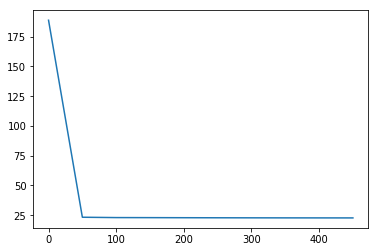

(1, 29)
0   176.585359305
50   22.7954299936
100   21.9238860054
150   21.7486233588
200   21.6433580093
250   21.5813270545
300   21.5513425924
350   21.5448541446
400   21.5553805627
450   21.5780104225


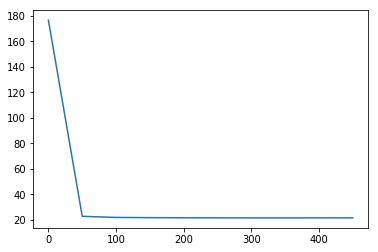

(2, 29)
0   181.45973537
50   22.5033665989
100   22.0190682692
150   21.9385449676
200   21.8479552305
250   21.7708997344
300   21.7103476773
350   21.6640854072
400   21.6294671632
450   21.6041597537


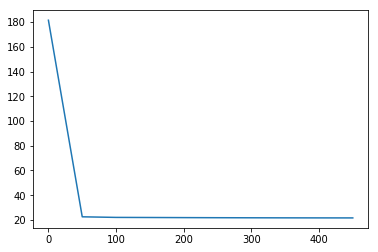

(3, 29)
0   176.66295909
50   20.8172167734
100   20.2776844878
150   20.2197631903
200   20.2049864744
250   20.2045559
300   20.2098214856
350   20.2174276998
400   20.2258515634
450   20.2343188329


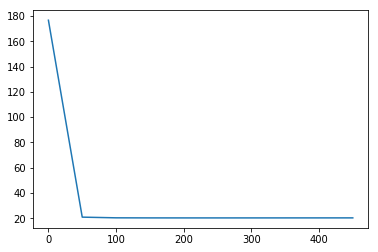

(4, 29)
0   173.346930321
50   20.1074765928
100   19.4912290717
150   19.4335230976
200   19.3648559236
250   19.3033122146
300   19.2538563936
350   19.2156860994
400   19.1869532854
450   19.165828213


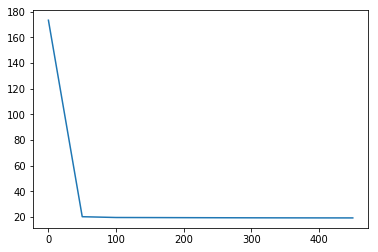

(5, 29)
0   184.794953686
50   23.0533977597
100   21.577101397
150   21.4990196832
200   21.4711387929
250   21.4470368955
300   21.4255197594
350   21.4065270775
400   21.3896543699
450   21.3744593053


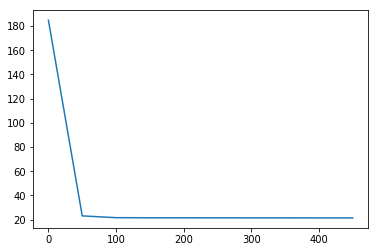

(6, 29)
0   170.508179276
50   24.4330422095
100   23.6511821547
150   23.4547040797
200   23.3366518536
250   23.255291612
300   23.1960251251
350   23.1513640072
400   23.1167983185
450   23.0894021765


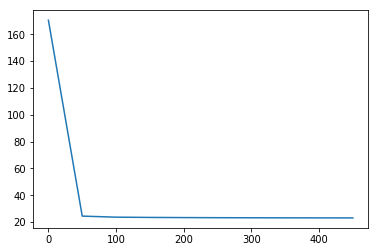

(7, 29)
0   171.096094641
50   23.5132379626
100   23.2578600602
150   23.2229054672
200   23.1784909686
250   23.1368299865
300   23.0996188371
350   23.0674117833
400   23.0398875958
450   23.0164474634


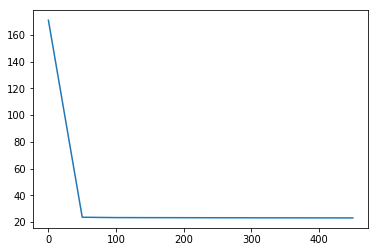

(8, 29)
0   180.905500703
50   23.6024853479
100   23.0762939088
150   22.9645778561
200   22.8733605804
250   22.7982483515
300   22.737473017
350   22.6890711027
400   22.6509599726
450   22.6211939457


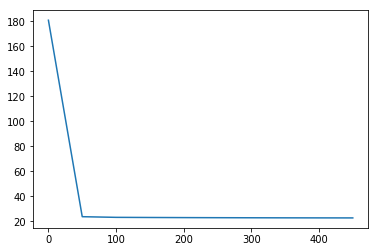

(9, 29)
0   179.322179504
50   24.3530229911
100   23.7453374166
150   23.6582865586
200   23.5817848601
250   23.5155690747
300   23.4599341126
350   23.4131314667
400   23.3736208695
450   23.3401973804


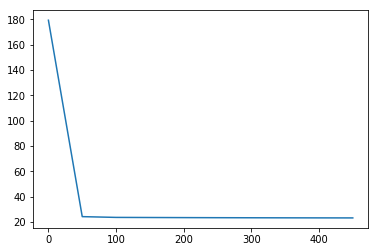

(10, 29)
[[ -0.79562563   0.12739703  -0.28402301   0.64854067  -1.3627247
    2.8310527    0.63653485  -1.7946489    0.9060273    0.52657227
   -2.33570127   0.75970444  -3.60898612   1.1769258    1.92639082
   -0.21950209  -0.28473174   1.42114085  -0.21601937  -2.37724759
   -0.74855344  -1.52638688   1.2706464    2.01808397  -0.07952622
   -6.79840124   6.87764396  -0.81680361  21.85568292]
 [  0.32605069   0.71319888   3.94176696   0.81444664  -0.34967877
    1.81875034   0.40575562  -2.57297168  -0.08103004   1.21580388
   -2.16402385   0.75341418  -4.81619471   1.35457175   1.67236275
    0.36267964   5.12742299   2.19152057  -0.6167475   -1.92204403
    1.80857183  -4.3096313    1.80436302   1.21406314  -0.06544504
  -18.48781723  12.88212042  -0.6882167   24.36402947]
 [ -1.25632251   0.41785246  -0.03107238   1.18286608  -2.17903137
    1.57623638   0.96624281  -2.72346291   0.49532616   1.89025274
   -2.10234055   0.5548225   -4.5202197    1.98263892   2.5309186
   -1.913000

In [73]:
imp_col_indices = [2, 4, 6, 8, 9]
import time
s_t = time.time()
X_train_new = add_more_features(X_train, imp_col_indices)
X_train_scaled = scale_features(X_train_new)

arr_m = gen_linear_regressors(X_train_new, Y_train, 0.75, 10, 0.003, 500)

print(arr_m)
# m = gd(X_train_new, Y_train, 0.0007, 1000)

# print(m)
e_t = time.time()
print("Duration: ",e_t-s_t, "second")

In [74]:
X_test_new = add_more_features(X_test, imp_col_indices)
X_test_scaled = scale_features(X_test_new)

Y_pred =  predict_from_models(X_test_new, arr_m)
#print(Y_pred)
#Y_pred = predict(X_test_new, m)
np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')
#print(score(Y_train, predict_from_models(X_train_new, arr_m)))


0   [ 15.11706231  25.34571102  18.61141031  25.17427474  18.87340865
   4.07264307  30.88420133  27.58974401  17.29738916  23.52091368
  24.99622473  17.35172404  18.17802907  18.21220539  42.62827974
  22.4008989   22.05302874  27.70846709  18.55508528  32.40782187
  22.04670792  25.0875233   33.8065593   33.64872461  34.00244188
  19.28693964  25.03073062  32.24712829  23.74344643  34.35621177
  16.41331788  24.54056847  20.36472334  24.88133314  16.09138813
  30.87047232  25.31047563  19.1706166   24.51812359  10.76059456
   8.6104911   28.10986422  30.41434571  20.42041701  18.6630826
   1.84851516  40.88220526  24.61819738  32.70619831  15.50287856
  17.1574824   40.62752706  16.47251432  19.88322724  15.96556037
  22.80999117  17.38038308  24.14317186  13.20939072  16.84772349
  13.01854375  27.33857138  25.70569405  25.19812854  16.42965367
  14.53669509  35.14692071  16.60274799  25.2018574   20.65323155
  29.22948414  27.11594165  18.43161068   5.65608673  35.0525822
  25.458